<a href="https://colab.research.google.com/github/edisonara/-NRC_6181-EdisonArambulo_Lab3Unidad1./blob/master/Analisis_Pectona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# Change the path to the file you want to access
file_path = '/content/drive/My Drive/02_VICULACION_EDISON_ARAMBULO/04 ANEXOS VINCULACION/03 Analisis de data/PEPTONA.xlsx'

# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
df = pd.read_excel(file_path)
print(df)


In [1]:
json_data = excel_data.to_json(orient='records')

# Guardar el JSON en un archivo
json_file_path = '/content/drive/My Drive/02_VICULACION_EDISON_ARAMBULO/04 ANEXOS VINCULACION/03 Analisis de data/PEPTONA.xlsx'
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

json_file_path

NameError: name 'excel_data' is not defined

**Distribución de Frecuencia**

Histograma para la variable #UFC

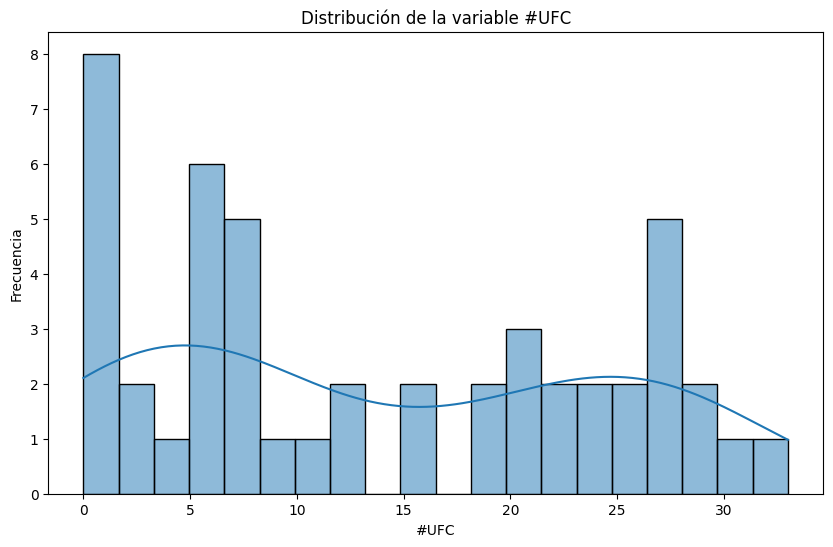

In [ ]:
# Histograma de la variable `#UFC`
plt.figure(figsize=(10, 6))
sns.histplot(df['#UFC'], bins=20, kde=True)
plt.title('Distribución de la variable #UFC')
plt.xlabel('#UFC')
plt.ylabel('Frecuencia')
plt.show()


**Medidas de Tendencia Central**

Gráfico de barras mostrando medias de Media Areas para diferentes Tatamientos

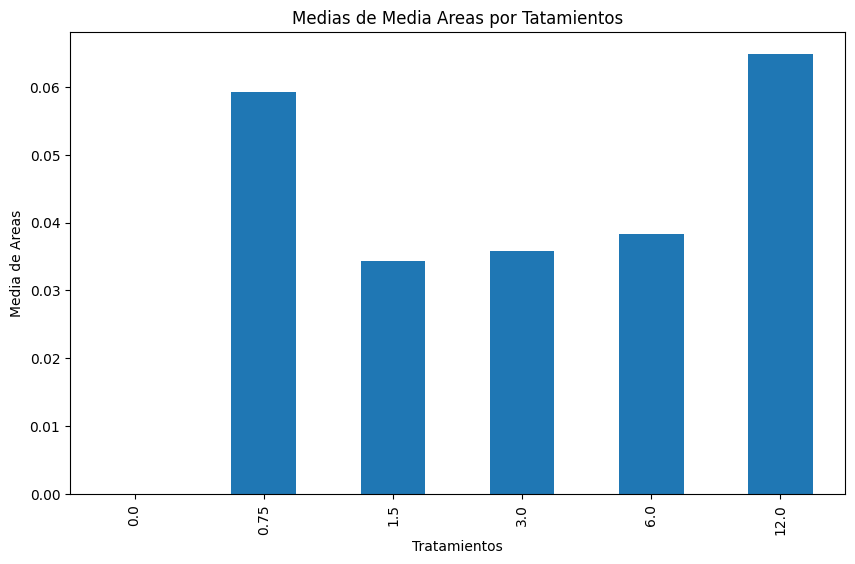

In [ ]:
# Gráfico de barras de medias de `Media Areas` para diferentes `Tatamientos`
plt.figure(figsize=(10, 6))
df.groupby('Tratamientos')['Media Areas'].mean().plot(kind='bar')
plt.title('Medias de Media Areas por Tatamientos')
plt.xlabel('Tratamientos')
plt.ylabel('Media de Areas')
plt.show()


**Medidas de Dispersión**

Diagrama de caja (boxplot) para Area Total por Tatamientos

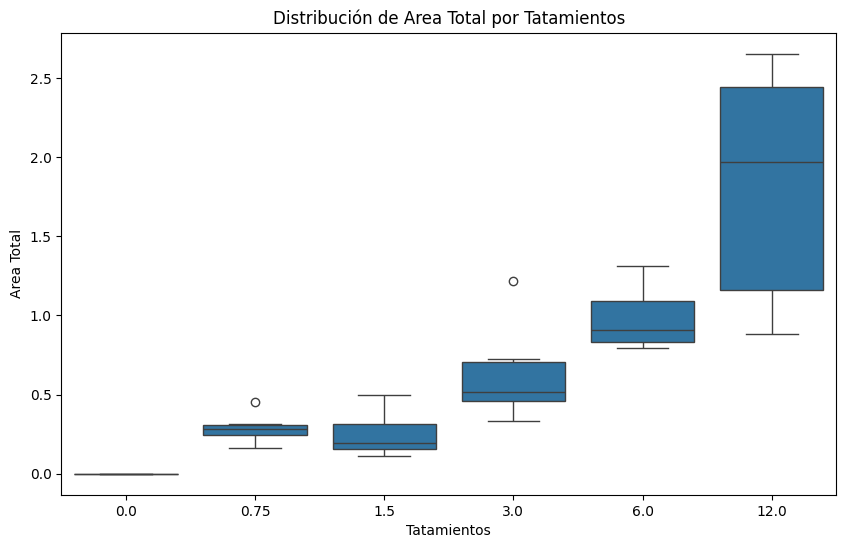

In [ ]:
# Diagrama de caja de `Area Total` para diferentes `Tatamientos`
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tratamientos', y='Area Total', data=df)
plt.title('Distribución de Area Total por Tatamientos')
plt.xlabel('Tatamientos')
plt.ylabel('Area Total')
plt.show()


**Análisis de la Varianza (ANOVA)**

Gráfico de barras con error estándar para #UFC por Tatamientos

<ipython-input-45-c05a73bd2489>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Tratamientos', y='#UFC', data=df, ci='sd')


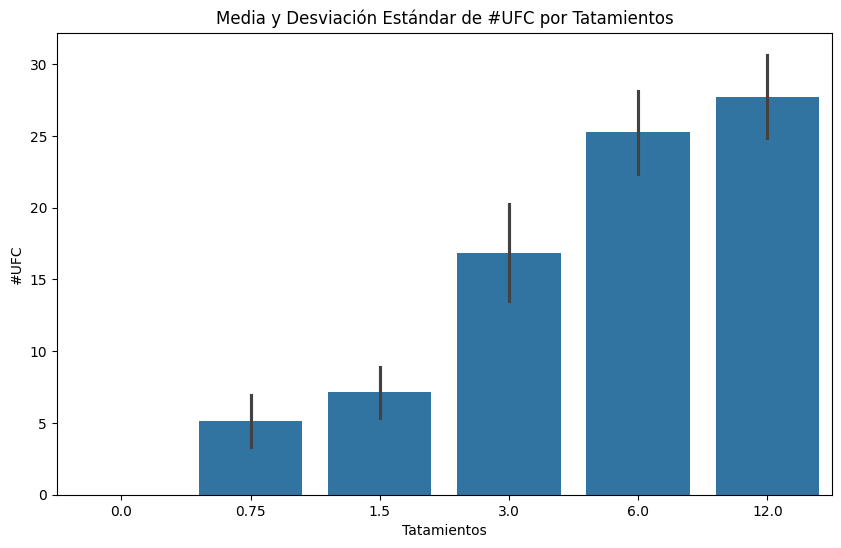

In [ ]:
# Gráfico de barras con error estándar de `#UFC` por `Tatamientos`
plt.figure(figsize=(10, 6))
sns.barplot(x='Tratamientos', y='#UFC', data=df, ci='sd')
plt.title('Media y Desviación Estándar de #UFC por Tatamientos')
plt.xlabel('Tatamientos')
plt.ylabel('#UFC')
plt.show()


**Correlación y Regresión**

Diagrama de dispersión entre Area Total y Media Areas

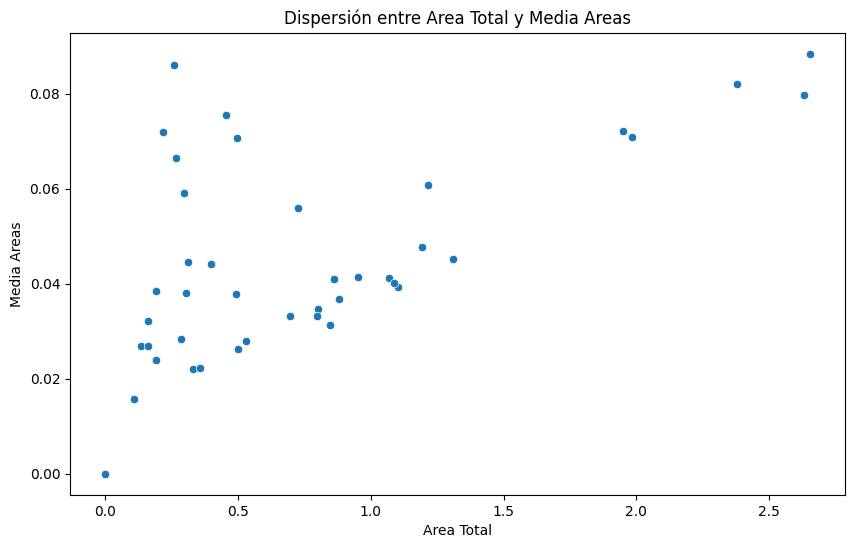

In [ ]:
# Diagrama de dispersión entre `Area Total` y `Media Areas`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area Total', y='Media Areas', data=df)
plt.title('Dispersión entre Area Total y Media Areas')
plt.xlabel('Area Total')
plt.ylabel('Media Areas')
plt.show()

**Series Temporales**

Gráfico de líneas para #UFC a lo largo de HORAS

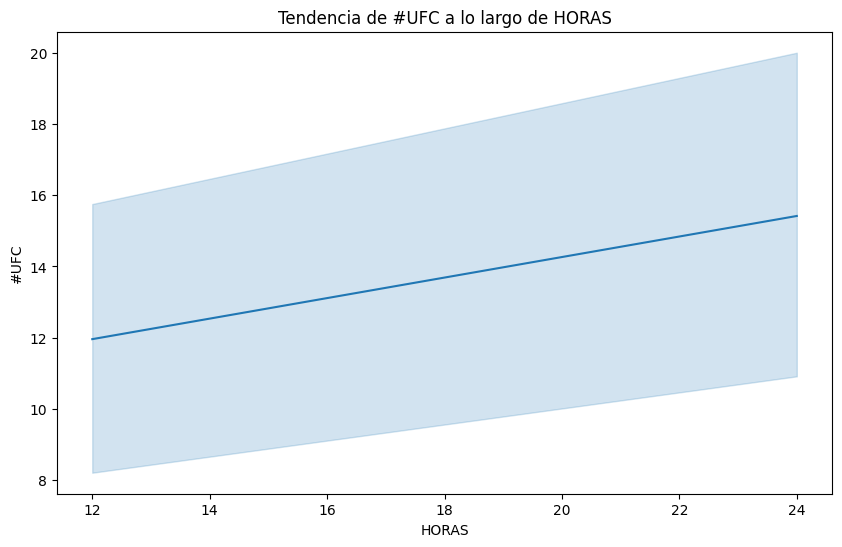

In [ ]:
# Gráfico de líneas de `#UFC` a lo largo de `HORAS`
plt.figure(figsize=(10, 6))
sns.lineplot(x='HORAS', y='#UFC', data=df)
plt.title('Tendencia de #UFC a lo largo de HORAS')
plt.xlabel('HORAS')
plt.ylabel('#UFC')
plt.show()


**Análisis de Componentes Principales (PCA)**

Diagrama de dispersión en 2D mostrando componentes principales de Media Areas y Area Total

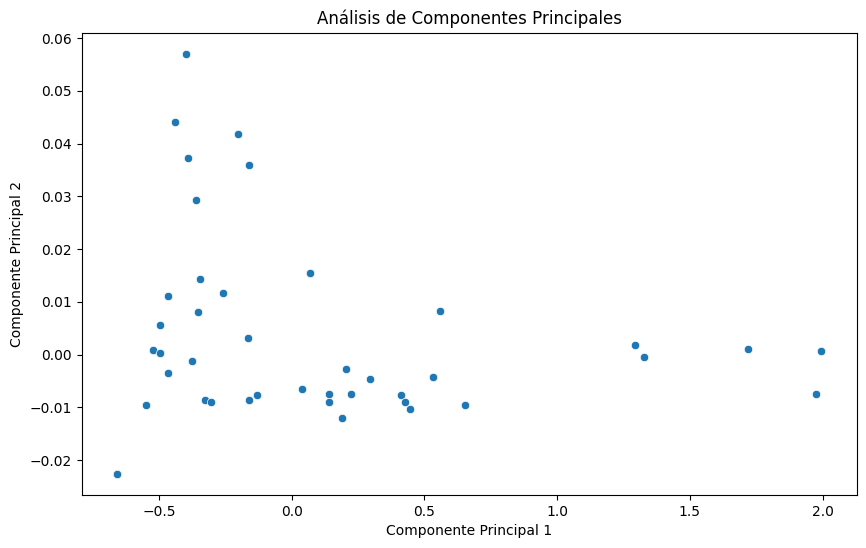

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df[['Media Areas', 'Area Total']].dropna())

# Crear un DataFrame con los componentes
pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'])

# Diagrama de dispersión de los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('Análisis de Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


**Tablas de Contingencia**

Gráfico de barras apiladas para Repeticion y Tatamientos

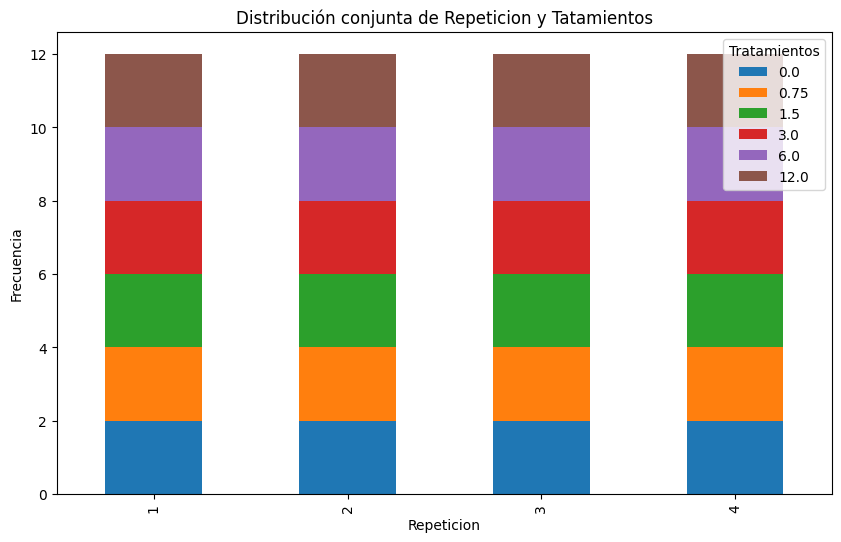

In [ ]:
# Gráfico de barras apiladas para `Repeticion` y `Tatamientos`
contingency_table = pd.crosstab(df['Repeticion'], df['Tratamientos'])
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución conjunta de Repeticion y Tatamientos')
plt.xlabel('Repeticion')
plt.ylabel('Frecuencia')
plt.show()


**Distribuciones Probabilísticas**

Gráfico de densidad para Media Areas

<ipython-input-50-1d0c0b9c5f9a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Media Areas'], shade=True)


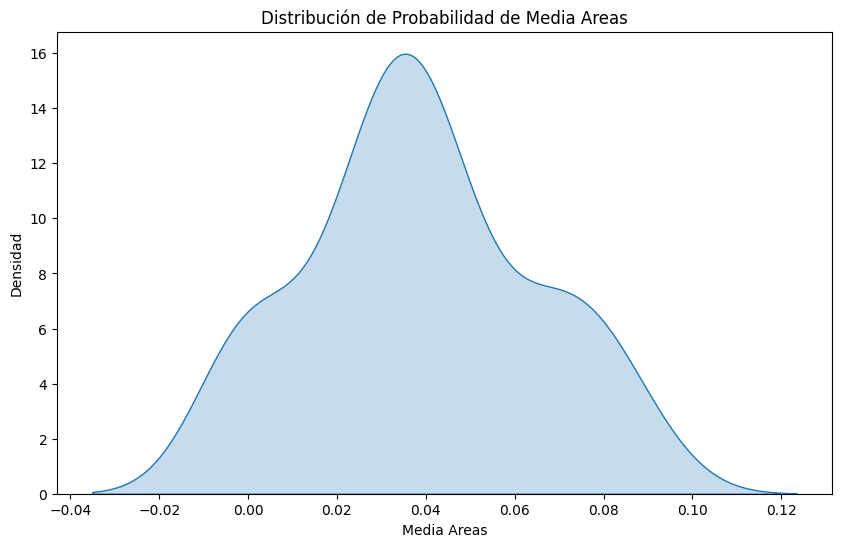

In [ ]:
# Gráfico de densidad de `Media Areas`
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Media Areas'], shade=True)
plt.title('Distribución de Probabilidad de Media Areas')
plt.xlabel('Media Areas')
plt.ylabel('Densidad')
plt.show()


**Análisis de Clúster**

Diagrama de dispersión coloreado por clústeres en #UFC y Media Areas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


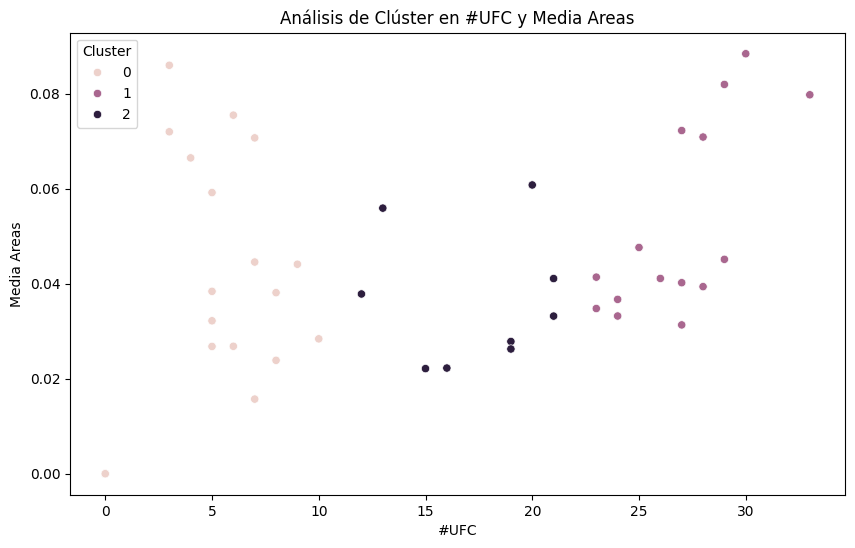

In [ ]:
from sklearn.cluster import KMeans

# Aplicar KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['#UFC', 'Media Areas']].dropna())

# Diagrama de dispersión coloreado por clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(x='#UFC', y='Media Areas', hue='Cluster', data=df)
plt.title('Análisis de Clúster en #UFC y Media Areas')
plt.xlabel('#UFC')
plt.ylabel('Media Areas')
plt.show()


**Gráficos de Caja y Bigote (Box and Whisker Plots)**

Comparar distribuciones de #UFC para diferentes HORAS

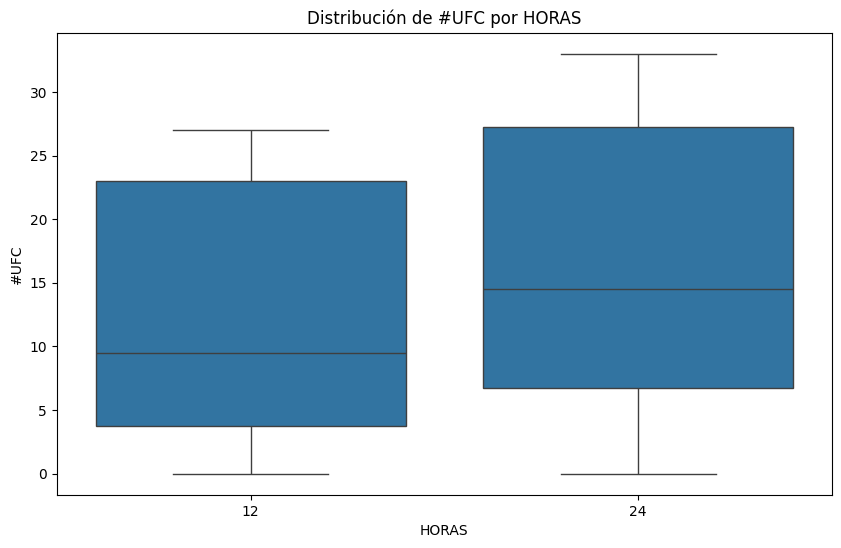

In [ ]:
# Diagrama de caja de `#UFC` para diferentes `HORAS`
plt.figure(figsize=(10, 6))
sns.boxplot(x='HORAS', y='#UFC', data=df)
plt.title('Distribución de #UFC por HORAS')
plt.xlabel('HORAS')
plt.ylabel('#UFC')
plt.show()


**Mapas de Calor (Heatmaps)**

Mostrar correlaciones entre #UFC, Media Areas y Area Total

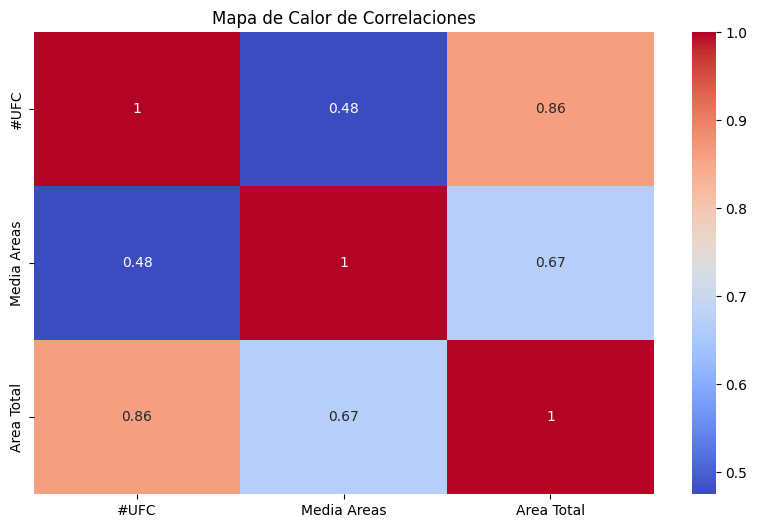

In [ ]:
# Mapa de calor de las correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(df[['#UFC', 'Media Areas', 'Area Total']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


**Gráficos de Pareto**

Barras y líneas para la distribución de la frecuencia relativa acumulada de #UFC

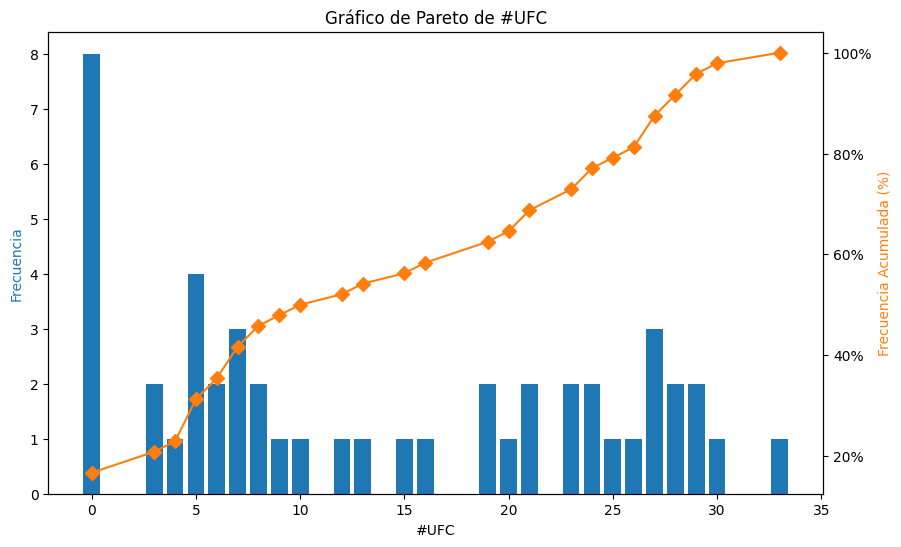

In [ ]:
# Gráfico de Pareto de la frecuencia acumulada de `#UFC`
pareto_data = df['#UFC'].value_counts().sort_index()
pareto_cumsum = pareto_data.cumsum() / pareto_data.sum() * 100

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(pareto_data.index, pareto_data, color='C0')
ax1.set_ylabel('Frecuencia', color='C0')
ax1.set_xlabel('#UFC')

ax2 = ax1.twinx()
ax2.plot(pareto_data.index, pareto_cumsum, color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax2.set_ylabel('Frecuencia Acumulada (%)', color='C1')

plt.title('Gráfico de Pareto de #UFC')
plt.show()


**Gráficos de Violin**

Visualizar la distribución de Media Areas para diferentes Tatamientos

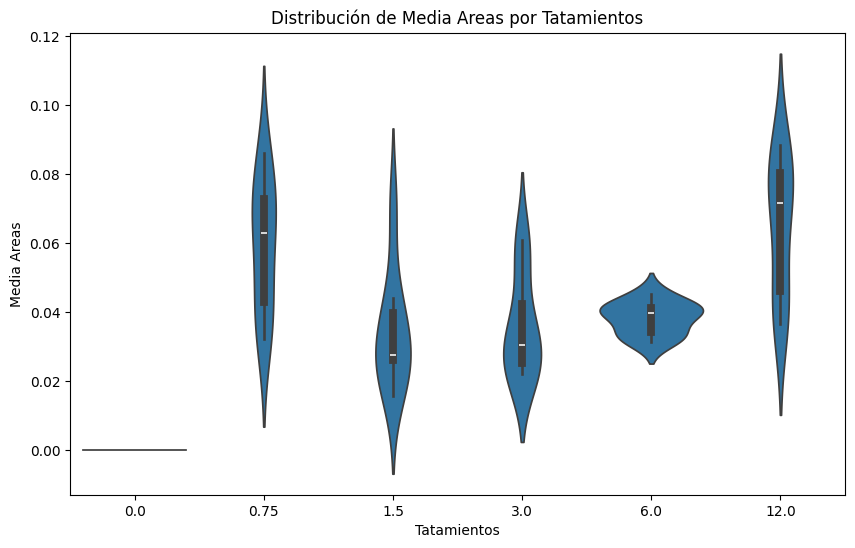

In [ ]:
# Gráfico de violín de `Media Areas` para diferentes `Tatamientos`
plt.figure(figsize=(10, 6))
sns.violinplot(x='Tratamientos', y='Media Areas', data=df)
plt.title('Distribución de Media Areas por Tatamientos')
plt.xlabel('Tatamientos')
plt.ylabel('Media Areas')
plt.show()


**Gráficos de Rosca (Donut Charts)**

Mostrar partes de un todo en la distribución de Tatamientos

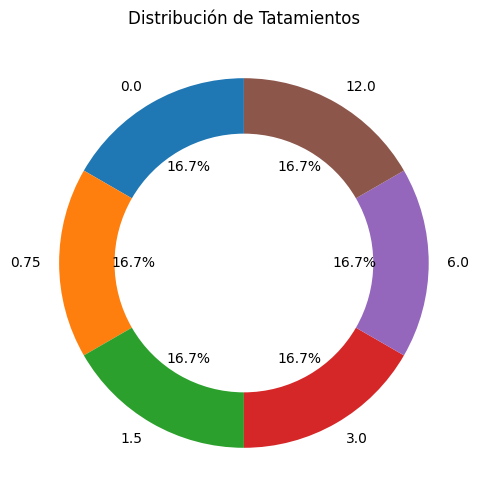

In [ ]:
# Gráfico de rosca de la distribución de `Tatamientos`
plt.figure(figsize=(10, 6))
sizes = df['Tratamientos'].value_counts()
labels = df['Tratamientos'].unique()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribución de Tratamientos')
plt.show()

